<a href="https://colab.research.google.com/github/Karishma-Kuria/ML-Mid-term/blob/main/ML_Midterm_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mid Term Project: US House Price Analysis and inference**

# **Business Narative**



###**Introduction**

We as a team,planning to start a real-state marketplace company and we start analyzing the data of USA current property listing in Zillow, to understand how property prices are across states and where we should focus more to understand the complexity of the market and buyer's interests to decide investing in a property. So we can influence market and predict property price. We can suggest people properties based on their featues priority and budget.



# **Data Narative**

Prices may differ state wise. It is more valuable to us if we narrow down our approach and  start analyzing data statewise rather than nation-wise. As a property with same feature may differ in price from different state. So we will furthur drill down into specific state and do analysis.


The data which is initialy provided has properties listed in zillow with specific propertyId, price of a house, their rank, address, no. of beds, baths and square footage. Although this dataset seems useful, there wasn't much use for our use case to predict the price of the house. 


So, we have  scraped data from Zillow and RedFin and added them to  dataset.

This notebook is focused on solving the problem of predicting house prices for house buyers who is keen in investing into buying properties for a good return.
The original dataset contains property from all over USA.

As the property value rises, an investor can benefit from its appreciation. For that, there are number of features related to a property that might be useful for our analysis. We will delve into these feature such as no of bedrooms, bathrooms, Area in square feet, Land Area, location - LONG & LAT, property ranking to analyze and predict whether the desired property is a good investment or bad.

Some people think of investing in housing property because of the house price since rent increase every year. Why not rent if you have money some may call it rent to own property. It is like you are saving for your own investment.



Questions to answer in our narrative are like:

1. Analysis : State wise data analysis.
what factors affect house prices in California and what's the role of property taxs are ?



###What is the golden cluster? # 
Data Narrative :
Golden Cluster shows a variety of listing type of houses. If I have a client, I will ask what is the budget of the houses they are looking for.

These are the range of the house listing with range of prices.
<ol>
<li>Lowest Price : House For Sale (250k ~ 2.8M)</li>
<li>Second Price : MultiFamily Home For Sale (150k ~ 1.75M)</li>
<li>Third Price : Condo (100k ~ 2.6M)</li>
<li>Fourth Price : Home For Sale (50k ~ 550k)</li>
<li>Fifth Price : Foreclosure (645k ~ 1.7M)</li>
</ol>

We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.

<ol>
<li>Load Data and Packages</li>
<li>Analyzing the Test Variable (Sale Price)</li>
<li>Multivariable Analysis</li>
<li>Impute Missing Data and Clean Data</li>
<li>Feature Transformation/Engineering</li>
<li>Modeling and Predictions</li>
</ol>

# **Import DataSet and Libraries** 

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set(style='white', context='notebook', palette='coolwarm')

In [ ]:
# read the input file
sheet_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTt6NRi_zTH-5fh5HFb4ynJHt3egAyNPmrp6MIC_db8diGFCi7AEHcAAdtnOT18N57227fZPQU8Yo0o/pub?gid=155099889&single=true&output=csv"

housing_data = pd.read_csv(sheet_url)
housing_data.head(2)

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,USD,3.0,3.0,2294.0 sqft,...,2024.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/41ca4905859...,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise...,https://www.zillow.com/homes/TX_rb/6_p/
1,711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,USD,5.0,4.0,3000.0 sqft,...,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/3071787e4e5...,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-W...,https://www.zillow.com/homes/NY_rb/18_p/


# **EDA and Data Preparation**

In [ ]:
print("There are {} rows and {} columns in this datasets".format(housing_data.shape[0],housing_data.shape[1]))

There are 5890 rows and 22 columns in this datasets


Look at the column datatypes and total number of rows for each column.

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             5890 non-null   int64  
 1   property_id      5890 non-null   int64  
 2   address          5890 non-null   object 
 3   latitude         5774 non-null   float64
 4   longitude        5774 non-null   float64
 5   price            5873 non-null   float64
 6   currency         5890 non-null   object 
 7   bathrooms        5342 non-null   float64
 8   bedrooms         5426 non-null   float64
 9   area             5290 non-null   object 
 10  land_area        443 non-null    object 
 11  zestimate        3968 non-null   float64
 12  rent_zestimate   4535 non-null   float64
 13  days_on_zillow   5886 non-null   float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  5890 non-null   bool   
 16  image            5890 non-null   object 
 17  listing_type  

Split the address into three sepearate entities - Street, City, State_zipcd.

In [ ]:
housing_data[['Street', 'City', 'State_zipcd']] = housing_data['address'].str.split(',', expand=True)

Now, split State and zipcode.

In [ ]:
# new field - state
housing_data['State'] = housing_data.State_zipcd.str.split(' ', expand = True)[1]

# new field - zip code (type integer)
housing_data['zipcode'] = housing_data.State_zipcd.str.split(' ', expand = True)[2]
housing_data['zipcode'] = housing_data["zipcode"].fillna(0)
housing_data['zipcode'] = housing_data['zipcode'].astype(int)

# drop unnecessary columns
housing_data.drop(['State_zipcd'], inplace=True, axis=1)

**What is the total percentage of null value per feature?**

In [ ]:
np.round((housing_data.isna().sum() / housing_data.shape[0]) * 100, 2)

rank                 0.00
property_id          0.00
address              0.00
latitude             1.97
longitude            1.97
price                0.29
currency             0.00
bathrooms            9.30
bedrooms             7.88
area                10.19
land_area           92.48
zestimate           32.63
rent_zestimate      23.01
days_on_zillow       0.07
sold_date          100.00
is_zillow_owned      0.00
image                0.00
listing_type         0.00
broker_name         42.70
input                0.00
property_url         0.00
listing_url          0.00
Street               0.00
City                 0.00
State                3.67
zipcode              0.00
dtype: float64

From the above description its clear that there are no values in sold_date column. So we can drop this column.

In [ ]:
housing_data.drop(['sold_date'], inplace=True, axis=1)

In [ ]:
housing_data.shape

(5890, 25)

**Checking Distribution of Price**

In [ ]:
housing_data.price.describe()

count    5.873000e+03
mean     8.304924e+05
std      1.581168e+06
min      1.000000e+00
25%      2.850000e+05
50%      5.199900e+05
75%      8.799000e+05
max      4.900000e+07
Name: price, dtype: float64

Apparently, and not surprisingly, there are some extreme outliers in the data.

**What is the price of most expensive and most inexpensive property?**

In [ ]:
print(f"The most expensive house worths R$ {housing_data.price.max()}")

The most expensive house worths R$ 49000000.0


In [ ]:
print(f"The cheapest property worths R$ {housing_data.price.min()}")

The cheapest property worths R$ 1.0


### Visulaizing the Density plot for the properties listed based on the Price of property.

In [ ]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 19.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import plotly.express as px
fig = px.density_mapbox(housing_data, lat='latitude', lon='longitude', z='price', radius=25,
                        center=dict(lat=35.55435, lon=-91.03677), zoom=2.5,
                        mapbox_style="stamen-terrain", opacity = 0.5, title = 'US Property Price Heatmap')
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The above graph shows that the proterty prices are heighest in California state with most of the properties listed more than 40M in cities such as Los Angeles and San Francisco Bay Area.

Fetch only the numerical value of area square feet.

In [ ]:
housing_data[['area_in_sqft','metric']] = housing_data['area'].str.split(' ', expand=True)
housing_data.drop(['metric','area'], inplace=True, axis=1)

Fetch only the numerical value of land area .

**Check whether we need land area**

 Convert acres into square feet in land area. i.e. 1 acre = 43560 sqft

In [ ]:
housing_data[['landarea_in_acres','metric']] = housing_data['land_area'].str.split(' ', expand=True)
housing_data['metric'].unique()
#housing_data.drop(['metric','land_area'], inplace=True, axis=1)

array([nan, 'sqft', 'acres'], dtype=object)

In [ ]:
housing_data['area_in_sqft'] = housing_data['area_in_sqft'].astype(np.float64)
housing_data['bedrooms'] = housing_data["bedrooms"].fillna(0)
housing_data['bathrooms'] = housing_data["bathrooms"].fillna(0)
housing_data['bedrooms'] = housing_data['bedrooms'].astype(int)

**Percentage of the Missing data in each column.**

Text(0.5, 1.0, 'Percent missing data by feature')

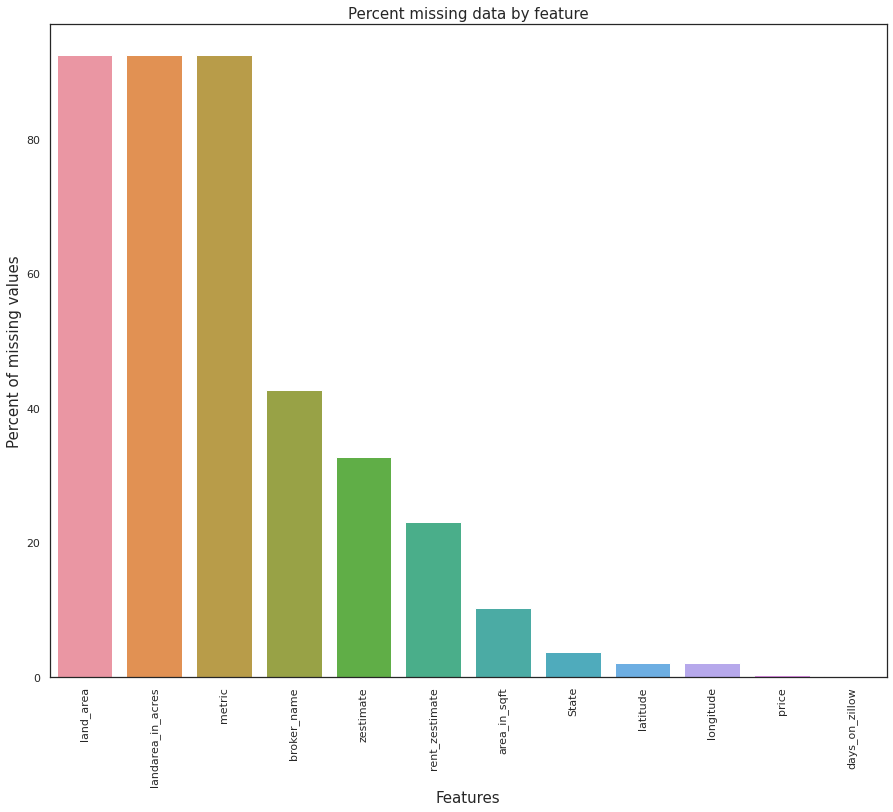

In [ ]:
# Find Missing Ratio of Dataset
housing_data_na = (housing_data.isnull().sum() / len(housing_data)) * 100
housing_data_na = housing_data_na.drop(housing_data_na[housing_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :housing_data_na})

# Percent missing data by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=housing_data_na.index, y=housing_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
housing_data["broker_name"] = housing_data["broker_name"].fillna("None")
housing_data["land_area"] = housing_data["land_area"].fillna(0)
#housing_data.drop("sold_date", inplace=True)


## **Univariate Analysis on each feature using Histogram.**

In [ ]:
# Getting Description
housing_data['price'].describe()

count    5.873000e+03
mean     8.304924e+05
std      1.581168e+06
min      1.000000e+00
25%      2.850000e+05
50%      5.199900e+05
75%      8.799000e+05
max      4.900000e+07
Name: price, dtype: float64

With an average house price of $830492.40, it seems like we should be able a buy a house in USA!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



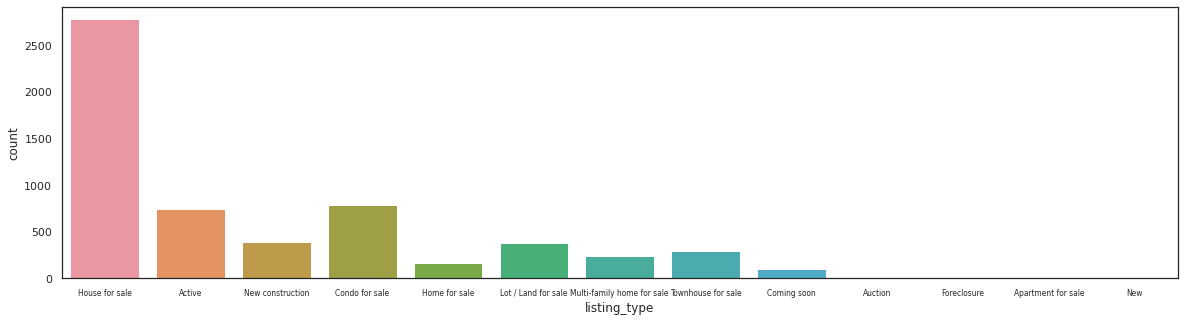

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(housing_data['listing_type'])
plt.xticks(fontsize=7.5);

**Observation:**

From the above plot, it is clear that more number of houses are put up for sale as compared to any other type of listing.

## **Correlation Matrix**

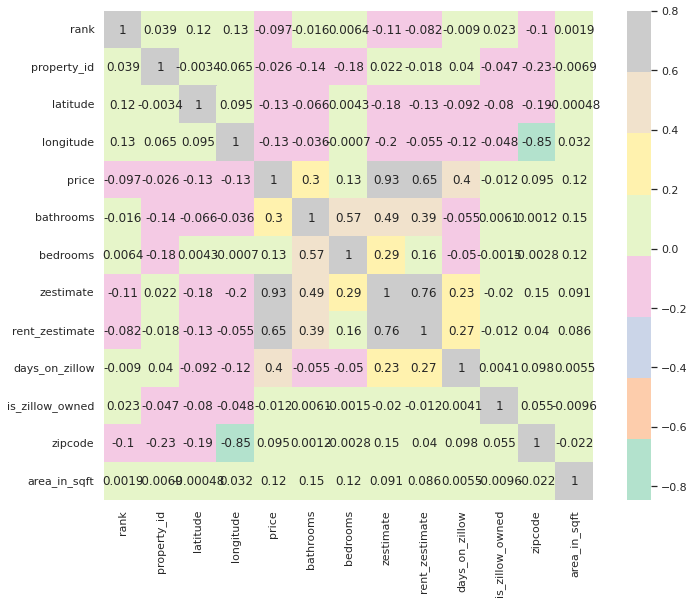

In [ ]:
# Correlation Matrix Heatmap
corrmat = housing_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,cmap='Pastel2');

Well, the most correlated feature to Price are as listed:-

<ul>
<li>area_in_sqft: Area of the property in square feet.</li>
<li>Land Area: Ground land area in square feet</li>
<li>bathrooms: No of Bathrooms</li>
<li>bedrooms: No of Bedrooms</li>
<li>zestimate: Zillow estimated sale price</li>
<li>rent_zestimate: Zillow estimated rent of the property</li>
</ul>


## **Bivariant Analysis**

**Let's take a look at how each relates to Sale Price and do some pre-cleaning on each feature if necessary.**

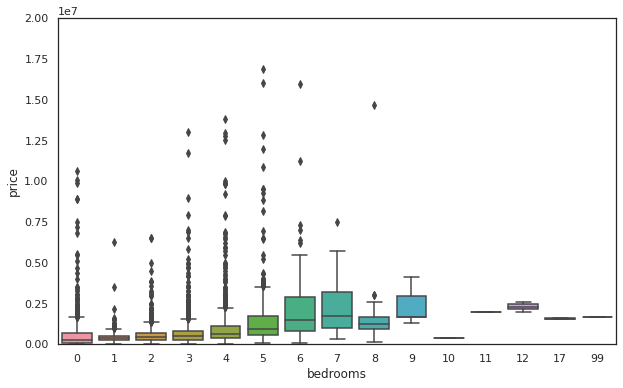

In [ ]:
# Bedroom vs Sale Price
var = 'bedrooms'
data = pd.concat([housing_data['price'], housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=20000000);

**Observation**:

Bedrooms <= 9 shows decent price of the property  whereas  bedrooms more than 9 results in less property value, which does not make sense. Lets consider such rows as outliers and remove them from our analysis.

In [ ]:
# Removing outliers manually (More than 4-cars, less than $300k)
housing_data = housing_data.drop(housing_data[(housing_data['bedrooms']>9) 
                         & (housing_data['price']<3000000)].index).reset_index(drop=True)

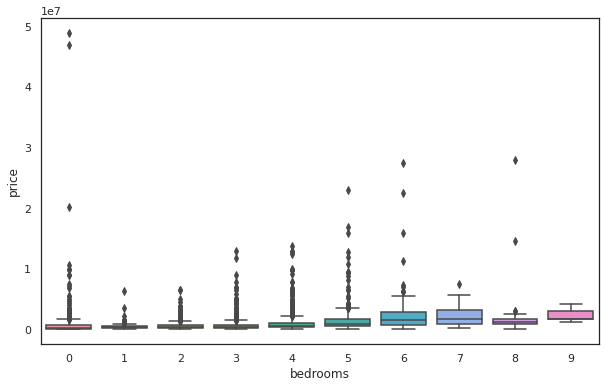

In [ ]:
# Bedroom vs Sale Price
var = 'bedrooms'
data = pd.concat([housing_data['price'], housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=20000000);

This bedroom distribution looks better for the analysis.

### **Bedroom vs Sale Price**

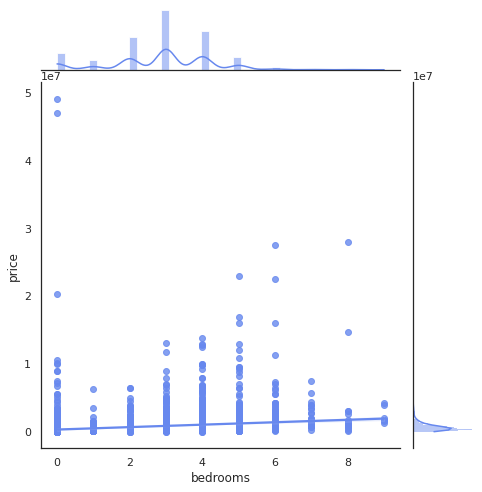

In [ ]:
# Bedroom vs Sale Price
sns.jointplot(x=housing_data['bedrooms'], y=housing_data['price'], kind='reg',height=7);

### **Bathrooms vs Sale Price**

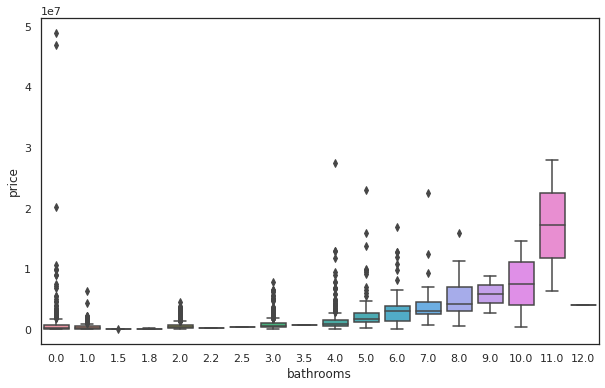

In [ ]:
# Bathrooms vs Sale Price
var = 'bathrooms'
data = pd.concat([housing_data['price'], housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=20000000);

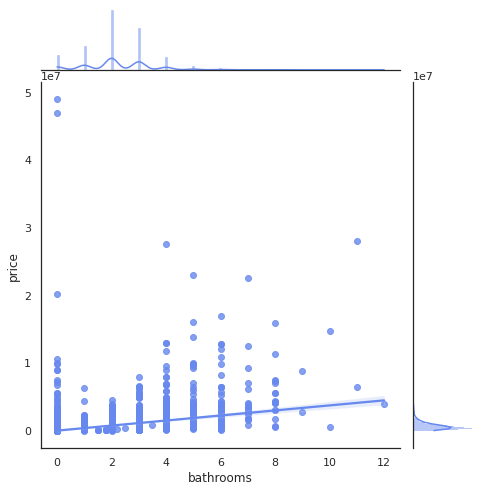

In [ ]:
# Bathrooms vs Sale Price
sns.jointplot(x=housing_data['bathrooms'], y=housing_data['price'], kind='reg',height=7);

### **Property Area vs Sale Price**

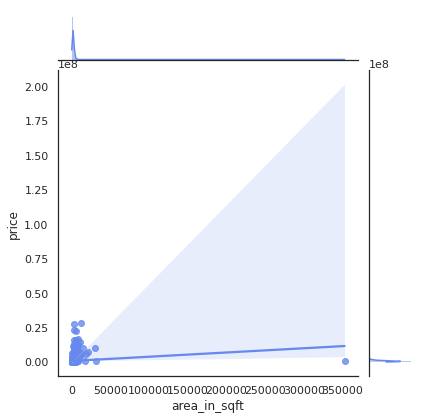

In [ ]:
# Property Area vs Sale Price
sns.jointplot(x=housing_data['area_in_sqft'], y=housing_data['price'], kind='reg')

Here also we see that for area > 350K, the sale price is less which does not make sense. Hence let consider this an outlier and remove from our analysis.

In [ ]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
housing_data = housing_data.drop(housing_data[(housing_data['area_in_sqft']>300000) 
                         & (housing_data['price']<2000000)].index).reset_index(drop=True)

### **Area vs Price**

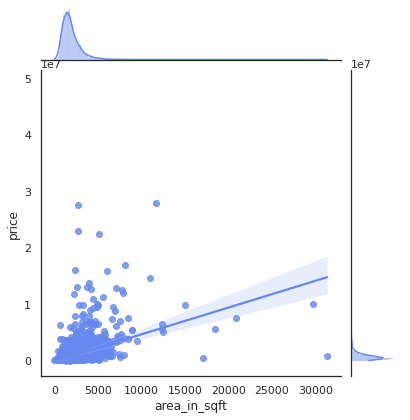

In [ ]:
# Area vs Price
sns.jointplot(x=housing_data['area_in_sqft'], y=housing_data['price'], kind='reg')

In [ ]:
housing_data.columns

Index(['rank', 'property_id', 'address', 'latitude', 'longitude', 'price',
       'currency', 'bathrooms', 'bedrooms', 'land_area', 'zestimate',
       'rent_zestimate', 'days_on_zillow', 'is_zillow_owned', 'image',
       'listing_type', 'broker_name', 'input', 'property_url', 'listing_url',
       'Street', 'City', 'State', 'zipcode', 'area_in_sqft',
       'landarea_in_acres', 'metric'],
      dtype='object')

### **State wise property listing count**

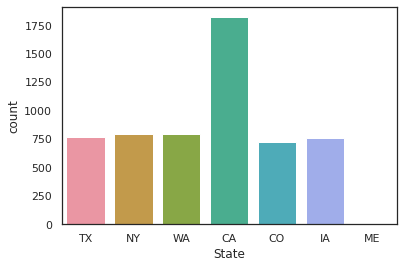

In [ ]:
sns.countplot(x=housing_data["State"])

**Observation** - 

It can be inferred that the California has most of the property listed in Zillow whereas New York has the least.

Check on prices and area in square feet, to remove rows that as NaN or null.

In [ ]:
# price
housing_data = housing_data.drop(housing_data[(housing_data['price'].isnull())].index).reset_index(drop=True)

# Area in Sqft
housing_data = housing_data.drop(housing_data[(housing_data['area_in_sqft'].isnull())].index).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 823037.25 and sigma = 1308339.14



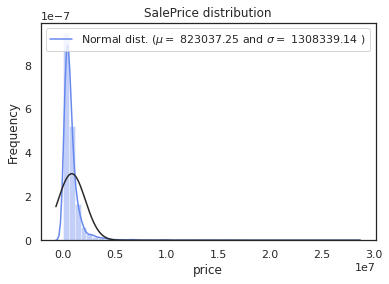

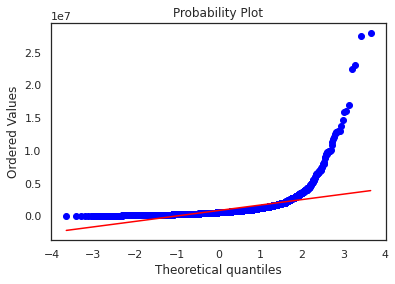

Skewness: 9.054722
Kurtosis: 127.941868


In [ ]:
# Plot Histogram
sns.distplot(housing_data['price'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(housing_data['price'], plot=plt)
plt.show()

print("Skewness: %f" % housing_data['price'].skew())
print("Kurtosis: %f" % housing_data['price'].kurt())

**Observation:**

Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution. Lets normalize this using box-cox method. We want our data to be as "normal" as possible.

##AMALGAMATION of NEW DATA by SCRAPING- 

Data is scraped from Zillow - https://drive.google.com/file/d/1Li-TUthF6Fk1H1rJawZ6Z8sZz1MssXhI/view?usp=sharing

The scraped data is used along with the original data for our machine learning tasks.


In [ ]:
housing_df = housing_data[['address','longitude','latitude','price','bathrooms', 'bedrooms','area_in_sqft']]

In [ ]:
scraped_df_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtuHj_0VYNtYx4LjFbfHIrQF416vvqm-TUsKcfPbYIu1tWd6MJbLPqRgSceheGhylYbYNMaJd2ptv9/pub?output=csv"
scraped_df = pd.read_csv(scraped_df_url)
scraped_df.rename(columns={'livingArea' : 'area_in_sqft'}, inplace = True)
scraped_df.drop(columns="Unnamed: 0", inplace=True)
scraped_df.head(2)


,dateSold,propertyType,lotAreaValue,address,imgSrc,price,listingDateTime,longitude,latitude,listingStatus,...,country,currency,lotAreaUnit,hasImage,listingSubType.is_FSBA,listingSubType.is_openHouse,listingSubType.is_newHome,listingSubType.is_forAuction,listingSubType.is_comingSoon,listingSubType.is_foreclosure
0,NaN,SINGLE_FAMILY,3759.0,"5099 Amberwood Dr, Fremont, CA 94555",https://photos.zillowstatic.com/fp/13fa0a5a158...,1450000,NaN,-122.05272,37.564774,FOR_SALE,...,USA,USD,sqft,True,True,NaN,NaN,NaN,NaN,NaN
1,NaN,SINGLE_FAMILY,6098.4,"3659 Haven Ave, Fremont, CA 94538",https://photos.zillowstatic.com/fp/a60b29629f0...,1099000,NaN,-121.95382,37.527164,FOR_SALE,...,USA,USD,sqft,True,True,NaN,NaN,NaN,NaN,NaN


In [ ]:
scraped_df = scraped_df[['address','longitude','latitude','price','bathrooms','bedrooms','area_in_sqft']]
scraped_df  

,address,longitude,latitude,price,bathrooms,bedrooms,area_in_sqft
0,"5099 Amberwood Dr, Fremont, CA 94555",-122.052720,37.564774,1450000,3,3.0,1686.0
1,"3659 Haven Ave, Fremont, CA 94538",-121.953820,37.527164,1099000,2,3.0,1232.0
2,"4499 Cahill St, Fremont, CA 94538",-121.972664,37.531994,1099000,2,4.0,1575.0
3,"43288 Chatterton Ct, Fremont, CA 94538",-121.951370,37.517410,1749000,4,5.0,2401.0
4,"661 Monticello Ter, Fremont, CA 94539",-121.913690,37.533740,10998000,10,7.0,14390.0
...,...,...,...,...,...,...,...
334,"1225 Vienna Drive, #730 Plan, Plaza Del Rey",-122.001010,37.401196,299900,3,2.0,1580.0
335,"1225 Vienna Drive, #725 Plan, Plaza Del Rey",-122.001010,37.401196,299900,3,2.0,1580.0
336,"1050 Lois Ave, Sunnyvale, CA 94087",-122.054436,37.361180,2750000,3,6.0,2411.0
337,"536 Hawthorn Ave, Sunnyvale, CA 94086",-122.019615,37.368034,2298000,2,3.0,1360.0


In [ ]:
scraped_df.shape

(339, 7)

In [ ]:
df = pd.concat([housing_df,scraped_df], ignore_index=True)
df.shape

(5623, 7)

**Considering the following the features for our clustering problem.**
Feature Selection based on Shap will be covered in detail later below.

In [ ]:
df = df[['price','bathrooms','bedrooms','area_in_sqft']]
features = ['price','bathrooms','bedrooms','area_in_sqft']

In [ ]:
df["area_in_sqft"] = df["area_in_sqft"].fillna(0)
df["bedrooms"] = df["bedrooms"].fillna(0)
cluster_df = df.copy()

Scaling and translating each feature individually in the given range of 0 to 1 on the training set.

In [ ]:
scalar = MinMaxScaler()
df[features] = scalar.fit_transform(df)

In [ ]:
#df[df.isna().any(axis=1)]

##APPLY PRINCIPAL COMPONENT ANALYSIS

Run PCA on the data and reduce the dimensions in pca_num_components dimensions.

In [ ]:
def Implement_PCA(n,df):
  pca = PCA(n_components=n)
  pca_data = pca.fit_transform(df)
  return pca_data


pca_df_2 = Implement_PCA(2,df)

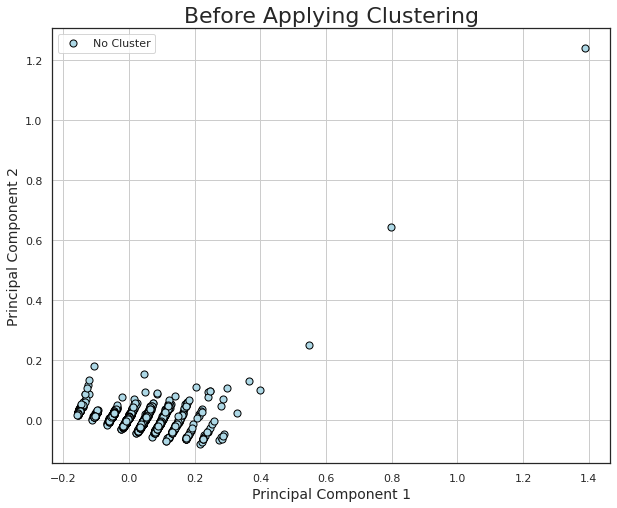

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
   pca_df_2[:, 0], pca_df_2[:, 1],
   c='lightblue', marker='o',
   edgecolor='black', s=50,
   label='No Cluster'
)
plt.title('Before Applying Clustering', fontsize=22)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


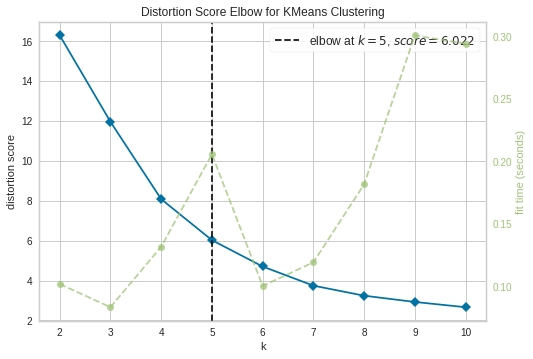

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,11))
 
visualizer.fit(df)        
visualizer.show()  ;

# **Clustering**

## **Elbow, Silhouette Analysis**

In [ ]:
X = cluster_df[['price','area_in_sqft']]
features = X.columns.values.tolist()

In [ ]:
# function for plotting cluster result
def plot_cluster( df, max_loops = 50):
  try :
    df.drop('kmeans_clust', axis=1, inplace=True)
  except:
    next
  
  X = df.iloc[:,1:]
  sse_within_cluster = {}
  silhoutte_score = {}


  for k in range(2, max_loops):
    kmeans= KMeans(n_clusters=k, random_state = 42, n_init=10)
    kmeans.fit(X)
    sse_within_cluster[k]= kmeans.inertia_
    silhoutte_score[k]= silhouette_score(X,kmeans.labels_,random_state=10)

  plt.figure(figsize=(9,8))
  ax1 = plt.subplot(311)
  plt.plot(list(sse_within_cluster.keys()),list(sse_within_cluster.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE within Clusters")
  plt.title("Within Cluster SSE after K-Means Clustering")
  plt.xticks([i for i in range(2,max_loops)],rotation=75,fontsize=9)


  ax2 = plt.subplot(312)
  plt.plot(list(sse_within_cluster.keys()),list(sse_within_cluster.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("silhouette Score")
  plt.title("silhouette Score after K-Means Clustering")
  plt.xticks([i for i in range(2,max_loops)],rotation=75,fontsize=9)

  ax3 = plt.subplot(313)
  km = KMeans(random_state = 42)
  visualizer = KElbowVisualizer(km, k=(2,max_loops))
  visualizer.fit(X)        
  visualizer.show() 

  #plt.subplot_tool()
  plt.subplots_adjust(top=0.9,bottom=0.1, left=0.15,right=0.95,hspace=0.9,wspace=0.9)

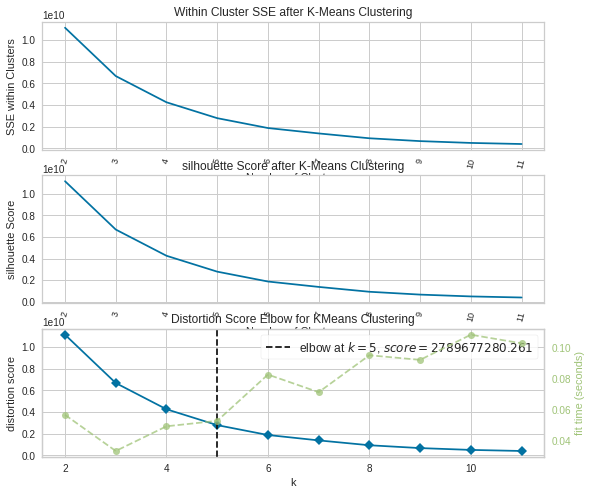

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_cluster(X,12);

The optimal number of cluster seems to be 5.

## **K-Mean Clustering**

In [ ]:
n_clusters = 5
kmeans = KMeans(n_clusters)
kmeans.fit(X)
X['kmean-cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



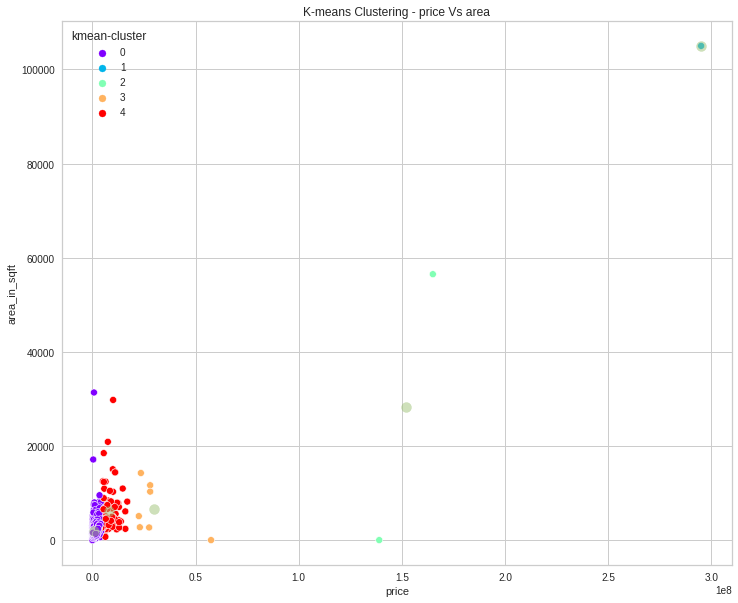

In [ ]:
plt.subplots(figsize=(12, 10))
plt.title('K-means Clustering - price Vs area')
sns.scatterplot(x=X['price'],y=X['area_in_sqft'], hue=X['kmean-cluster'], palette='rainbow')
km_centers = kmeans.cluster_centers_
plt.scatter(km_centers[:, 0], km_centers[:, 1], c='g', s=100, alpha=0.5);

The above plot shows our 5 clusters and their centroids.

In [ ]:
# clusters centers
km_centers

array([[7.36253090e+05, 1.88716501e+03],
       [2.95000000e+08, 1.05000000e+05],
       [1.52000000e+08, 2.82500000e+04],
       [3.00000000e+07, 6.67442857e+03],
       [7.96737864e+06, 6.23579070e+03]])

## **GMM**

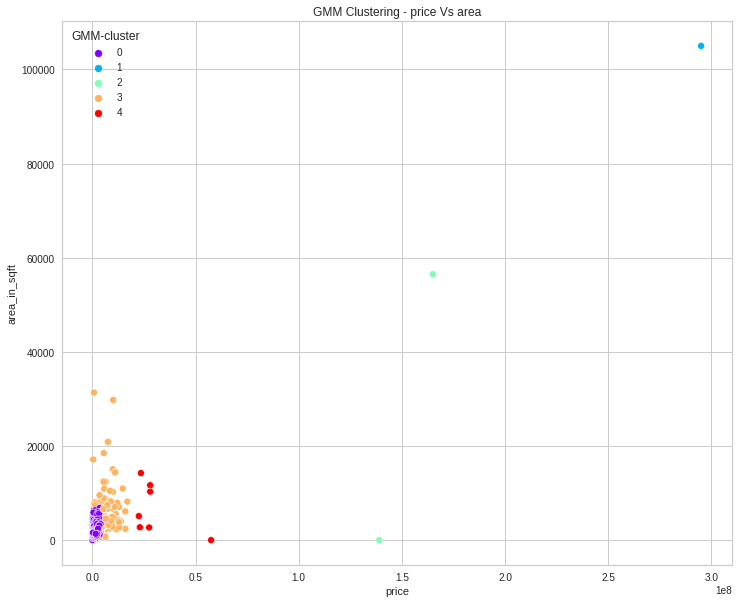

In [ ]:
clusters = 5   # per Silhuete 

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=clusters).fit(X)
labels = gmm.predict(X)
X['GMM-cluster'] = labels

plt.subplots(figsize=(12, 10))
plt.title('GMM Clustering - price Vs area')
sns.scatterplot(x=X['price'],y=X['area_in_sqft'],hue=X['GMM-cluster'], palette='rainbow')

**GMM has also provided similar results as Kmeans so Lets do Fractal clustering to find the Golden Cluster in our dataset.**

## **Fractal Clustering**

In [ ]:
# function to apply kmeans
def apply_cluster(df, clusters=2):
  """ 
  Apply Kmeans with the optimal number of clusters identified
  """
  try :
    df.drop('kmeans_clust', axis=1, inplace=True)
  except:
    next
  
  X = df.iloc[:,1:]
  kmeans= KMeans(n_clusters=clusters, random_state = 42, n_init=10)
  kmeans.fit(X)
  score= silhouette_score(X,kmeans.labels_,random_state=10)
  df['cluster'] = kmeans.labels_
  sse_within_cluster =kmeans.inertia_

  print("Clustering Performance")
  print("-------------------------------")
  print("Silhoutte Score -", str(score.round(2)))
  print("SSE with clustering - " + str(sse_within_cluster))

  return df

### **First Kmean Clustering Iteration**

In [ ]:
first_trial = apply_cluster(X,clusters=5);

Clustering Performance
-------------------------------
Silhoutte Score - 0.62
SSE with clustering - 2789681866.1753397


In [ ]:
first_trial 

,price,area_in_sqft,kmean-cluster,GMM-cluster,cluster
0,296000.0,2294.0,0,0,1
1,1995000.0,3000.0,0,0,0
2,425000.0,2575.0,0,0,0
3,895000.0,1248.0,0,0,1
4,391500.0,1752.0,0,0,1
...,...,...,...,...,...
5618,299900.0,1580.0,0,0,1
5619,299900.0,1580.0,0,0,1
5620,2750000.0,2411.0,0,0,0
5621,2298000.0,1360.0,0,0,1


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"area_in_sqft":"mean", "price": "mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_df

,cluster,area_in_sqft,price
0,1,1452.852647,6.501248e+05
1,0,3155.780147,1.421452e+06
2,4,8724.553846,6.659274e+06
3,3,39213.000000,5.860500e+07
4,2,105000.000000,2.950000e+08


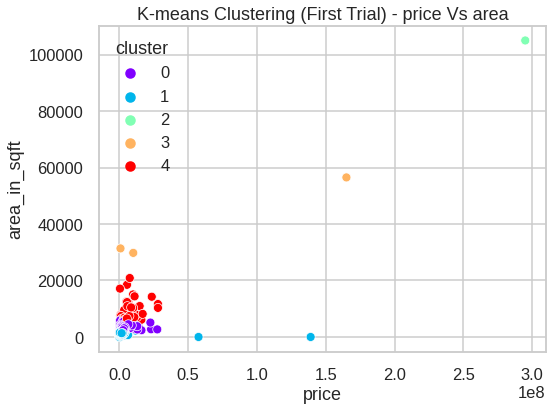

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sns.scatterplot(x=first_trial['price'],y=first_trial['area_in_sqft'],hue=first_trial['cluster'], palette='rainbow')
plt.title('K-means Clustering (First Trial) - price Vs area')
plt.show()

It is clear that K-Means has distinctly classified the clusters into 5 groups:-

<ul>
<li>Cluster 0 - Listing group that are low price and less property area upto 1250 sqft.</li>
<li>Cluster 1 - Listing group that has area in 2500 - 4500 sqft with price upto 27 Million dollars.</li>
<li>Cluster 2 - Listing group that has area more than 15000 sqft with price upto 10 Million dollars.</li>
<li>Cluster 3 - Listing group that has area in range 5000 - 15000 sqft with price upto 28 Million dollars.</li>
<li>Cluster 4 - Listing group that has area in range 1250 - 2500 sqft with price upto 17 Million dollars.</li>
</ul>

Also for the retiree to invest on a property with the meagre saving, the ideal choice of property can be found in cluster 1.

### **Second Kmean Clustering Iteration**

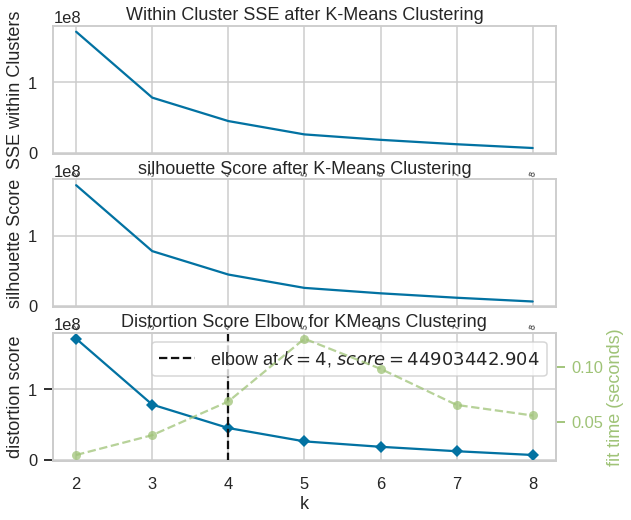

<Figure size 576x396 with 0 Axes>

In [ ]:
second_trial_data = X.query("cluster == 4").reset_index(drop=True)
plot_cluster(second_trial_data, 9);

  From the above graphs, it is concluded that the optimal number of cluster is 4.

In [ ]:
second_trial = apply_cluster(second_trial_data ,clusters=4)

Clustering Performance
-------------------------------
Silhoutte Score - 0.66
SSE with clustering - 44903442.90407178


In [ ]:
cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"area_in_sqft":"mean", "price": "mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_df

,cluster,area_in_sqft,price
0,2,18825.666667,4.466633e+06
1,0,7029.173913,5.165520e+06
2,1,13621.285714,1.034914e+07
3,3,10214.222222,1.215500e+07


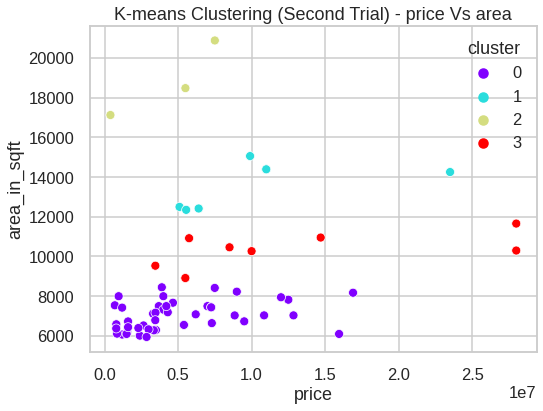

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sns.scatterplot(x=second_trial['price'],y=second_trial['area_in_sqft'],hue=second_trial['cluster'], palette='rainbow')
plt.title('K-means Clustering (Second Trial) - price Vs area')
plt.show()

It can be noted from the above plot that cluster 0 can be the ideal choice of investing the property.

### **Third Kmean Clustering Iteration**

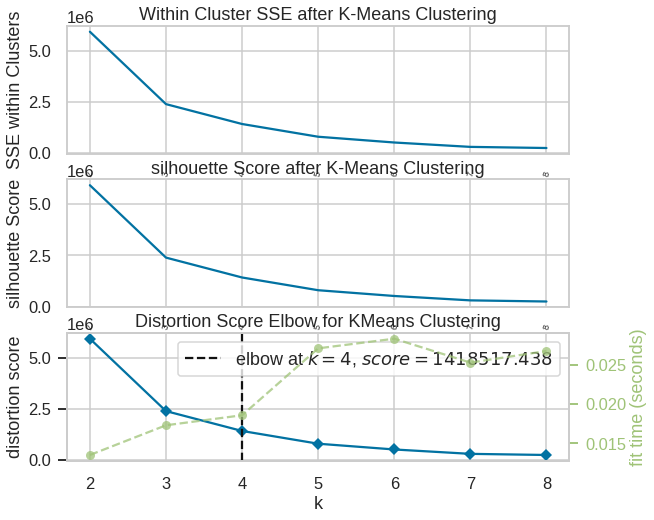

<Figure size 576x396 with 0 Axes>

In [ ]:
third_trial_data = second_trial_data.query("cluster == 0").reset_index(drop=True)
plot_cluster(third_trial_data, 9);


From the above graphs, it is concluded that the optimal number of cluster is 4.

In [ ]:
third_trial = apply_cluster(third_trial_data ,clusters=4)

Clustering Performance
-------------------------------
Silhoutte Score - 0.58
SSE with clustering - 1418517.4381016043


In [ ]:
cluster_perf_df = (
    third_trial
    .groupby('cluster')
    .agg({"area_in_sqft":"mean", "price": "mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_df

,cluster,area_in_sqft,price
0,0,6145.600000,3.613900e+06
1,2,6575.818182,3.707809e+06
2,1,7324.294118,5.526235e+06
3,3,8129.875000,8.342875e+06


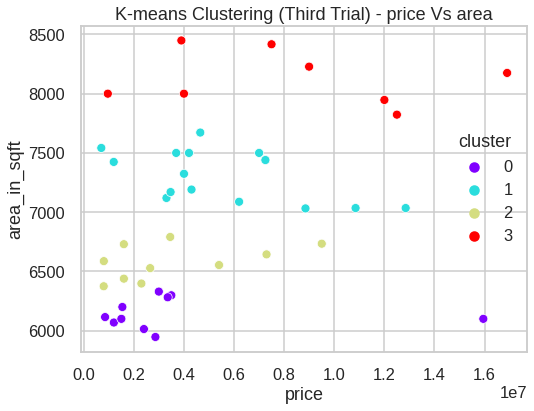

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sns.scatterplot(x=third_trial['price'],y=third_trial['area_in_sqft'],hue=third_trial['cluster'], palette='rainbow')
plt.title('K-means Clustering (Third Trial) - price Vs area')
plt.show()

It can be noted from the above plot that cluster 1 can be the ideal choice of investing the property.

### **Golden Cluster: Fourth Kmean Clustering Iteration**

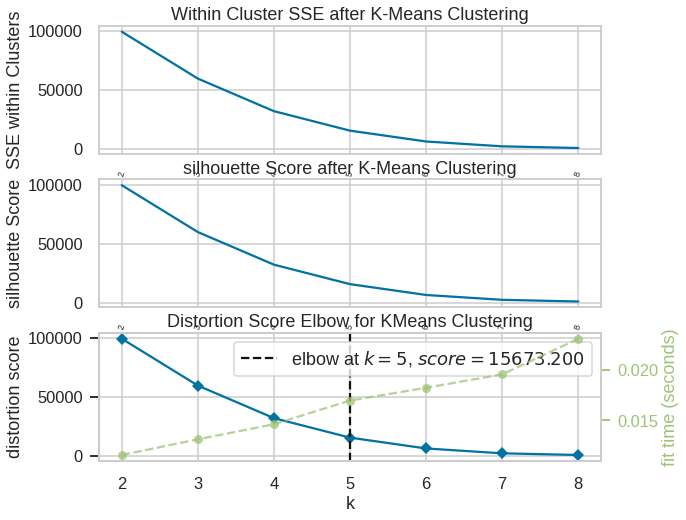

<Figure size 576x396 with 0 Axes>

In [ ]:
fourth_trial_data = third_trial_data.query("cluster == 1").reset_index(drop=True)
plot_cluster(fourth_trial_data, 9);


From the above graphs, it is concluded that the optimal number of cluster is 4.

In [ ]:
fourth_trial = apply_cluster(fourth_trial_data ,clusters=4)

Clustering Performance
-------------------------------
Silhoutte Score - 0.58
SSE with clustering - 32189.0


In [ ]:
cluster_perf_df = (
    fourth_trial
    .groupby('cluster')
    .agg({"area_in_sqft":"mean", "price": "mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_df

,cluster,area_in_sqft,price
0,3,7228.333333,3.921667e+06
1,2,7480.750000,4.435125e+06
2,0,7672.000000,4.650000e+06
3,1,7062.000000,8.410000e+06


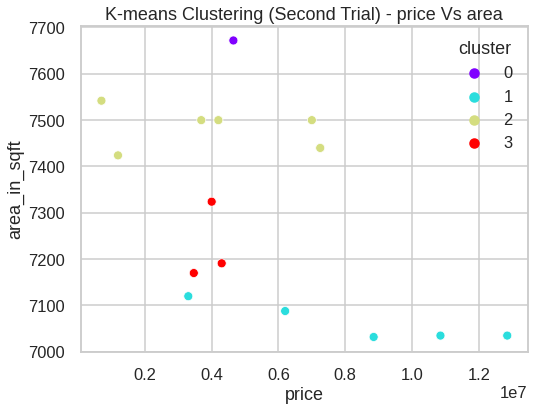

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sns.scatterplot(x=fourth_trial['price'],y=fourth_trial['area_in_sqft'],hue=fourth_trial['cluster'], palette='rainbow')
plt.title('K-means Clustering (Second Trial) - price Vs area')
plt.show()

Cluster 0 has group of properties that has adequate area of around ~1850 square feet and price upto 2 Million dollars unlike other clusters that have property price touching 3 Million. 

We think, cluster 0 would be the ideal list of properties, a retired person with a humble savings should be investing in. Since it has properties with good area and reasonable price. 

## **Analysing data more closely for the state with most of the listing and inflated price- California**

In [ ]:
df_ca = housing_data[['address', 'price', 'City', 'State', 'zipcode', 'bathrooms', 'bedrooms', 'area_in_sqft' ]].copy()

In [ ]:
df_ca.sample(5)

,address,price,City,State,zipcode,bathrooms,bedrooms,area_in_sqft
2098,"78-09 19th Dr FLOOR 1, East Elmhurst, NY 11370",499000.0,East Elmhurst,NY,11370,1.0,2,772.0
9,"1408C 21st Ave, Seattle, WA 98122",869000.0,Seattle,WA,98122,3.0,2,1497.0
4229,"579 W Virginia St, San Jose, CA 95125",1275000.0,San Jose,CA,95125,1.0,3,1184.0
2906,"3433 N Williams St, Denver, CO 80205",670000.0,Denver,CO,80205,2.0,3,1898.0
1268,"7944 Princess St, La Jolla, CA 92037",5700000.0,La Jolla,CA,92037,3.0,4,2201.0


In [ ]:
df_ca['State'].value_counts()

CA    1674
WA     740
CO     717
IA     670
TX     666
NY     606
Name: State, dtype: int64

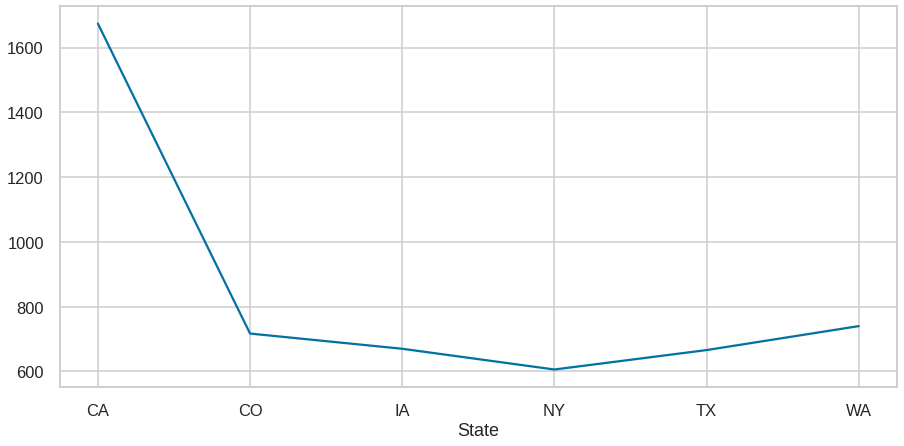

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_ca.groupby(['State']).count()['price'].plot(ax=ax)

### **It is worth noticing that There are property listing mostly in California and prices are high too.**

As per article in Norada: https://www.noradarealestate.com/blog/california-housing-market/

The California housing market sizzled last year to break all records. It was a hot seller's real estate market. According to Zillow, at the state level, California's housing market remains the most valuable in the country, with a total value of $9.24 trillion in December, accounting for more than a fifth – 21.3 percent – of the national total. 


And it seems to be true.

## CLUSTERING on area wise pricing for california

From a point of view of an investor who is a retiree, we need to come up with the list of properties that are affordable and has great appreciation value. 

For our clustering problem, we will only consider the property price and the property area to help the investor make a educated decision.

In [ ]:
X_CA = df_ca[['price','area_in_sqft']]
features = X_CA.columns.values.tolist()

In [ ]:
X_CA

,price,area_in_sqft
0,296000.0,2294.0
1,1995000.0,3000.0
2,425000.0,2575.0
3,895000.0,1248.0
4,391500.0,1752.0
...,...,...
5279,680000.0,1770.0
5280,644990.0,2157.0
5281,210000.0,1576.0
5282,850000.0,1860.0


In [ ]:
ca_cluster = apply_cluster(X_CA,clusters=5);

Clustering Performance
-------------------------------
Silhoutte Score - 0.54
SSE with clustering - 1156593710.2239554


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ca_cluster

,price,area_in_sqft,cluster
0,296000.0,2294.0,4
1,1995000.0,3000.0,1
2,425000.0,2575.0,1
3,895000.0,1248.0,0
4,391500.0,1752.0,4
...,...,...,...
5279,680000.0,1770.0,4
5280,644990.0,2157.0,4
5281,210000.0,1576.0,4
5282,850000.0,1860.0,4


In [ ]:
cluster_perf_ca = (
    ca_cluster
    .groupby('cluster')
    .agg({"area_in_sqft":"mean", "price": "mean"})
    .sort_values('price')
    .reset_index()
)

cluster_perf_ca

,cluster,area_in_sqft,price
0,0,1106.583911,4.823845e+05
1,4,1943.415149,7.104472e+05
2,1,3199.353409,1.419124e+06
3,3,5921.087248,3.628166e+06
4,2,22112.000000,5.685483e+06


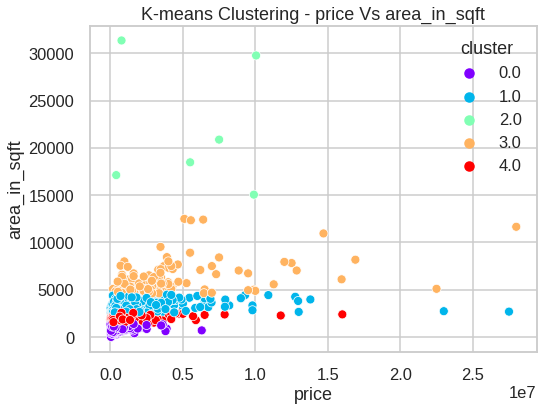

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sns.scatterplot(x=first_trial['price'],y=ca_cluster['area_in_sqft'],hue=ca_cluster['cluster'], palette='rainbow')
plt.title('K-means Clustering - price Vs area_in_sqft')
plt.show()

and we can see here mostly 1943 to 3199 sqrt ft area  is higher on price.

# **Amalgamation of second dataset**

Since the original dataset had not enough features to do the prediction so based on the Number of highest property listing in all the states, California has topped the list and contains maximum listings. Which makes it the best hot market for all the potential buyers or retirees to do investment in this location. Hence we have further used the Calafornia property dataset to do the price prediction analysis for the potential customers based on various features described below.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import time

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
# read the input file
#add_data = pd.read_csv("/content/drive/MyDrive/train 2.csv", engine="python",encoding='utf-8',)

add_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSloazRLHesU_5PeVD6g2XH5fN2J3UgMnM-ADEZxMPkWbyKFONlIPbOYWLGHRkysywchy1wezxfeME-/pub?output=csv", engine="python",encoding='utf-8')
add_data.head(5)

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000,THE PERFECT CABIN TO FLIP! Strawberry delight...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000,2016-06-27,900000.0,Creston,93432,CA


### **Data Preprocessing**

In [ ]:
# check the missing value in training data
missing_train = add_data  .isnull().sum().sort_values(ascending = False)
missing_train

Last Sold On                   17766
Last Sold Price                17766
Middle School Score            16705
Middle School Distance         16704
Middle School                  16704
Lot                            14181
Laundry features               14124
Appliances included            13442
Cooling features               11782
Flooring                       11564
Cooling                        10622
Full bathrooms                  7865
Heating features                7165
Heating                         6465
High School Score               5219
High School Distance            5001
High School                     5000
Elementary School Score         4896
Elementary School Distance      4742
Elementary School               4742
Annual tax amount               4310
Parking features                4308
Tax assessed value              3652
Bathrooms                       3465
Bedrooms                        2872
Total interior livable area     2526
Year built                      1045
G

In [ ]:
df_ca_new = add_data[['Sold Price', 'Year built', 'Bedrooms', 'Total interior livable area', 'Bathrooms','Tax assessed value', 'Annual tax amount', 'Elementary School Score', 'Middle School Score', 'High School Score', 'Zip', 'Listed On' ]].copy()

In [ ]:
df_ca_new.shape

(47439, 12)

In [ ]:
df_ca_new

,Sold Price,Year built,Bedrooms,Total interior livable area,Bathrooms,Tax assessed value,Annual tax amount,Elementary School Score,Middle School Score,High School Score,Zip,Listed On
0,3825000,1969.0,"Ground Floor Bedroom, Master Bedroom on Ground...",1.0,0.0,886486.0,12580.0,7.0,NaN,8.0,94022,2019-10-24
1,505000,1926.0,3,872.0,2.0,505000.0,6253.0,3.0,2.0,2.0,90047,2019-10-16
2,140000,1958.0,2,1152.0,3.0,49627.0,468.0,NaN,NaN,NaN,95375,2019-08-25
3,1775000,1947.0,5,2612.0,3.0,1775000.0,20787.0,9.0,7.0,8.0,90230,2019-10-24
4,1175000,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,93432,2019-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...
47434,159000,1965.0,3,1432.0,2.0,125049.0,1298.0,3.0,NaN,3.0,92225,2020-09-04
47435,255000,1999.0,3,1560.0,2.0,68924.0,721.0,5.0,6.0,7.0,94089,2020-07-23
47436,2300000,1919.0,3,1860.0,2.0,578000.0,7211.0,7.0,3.0,7.0,90046,2020-12-01
47437,500000,2017.0,3,2125.0,3.0,484696.0,7627.0,7.0,7.0,8.0,95757,2020-08-01


In [ ]:
df_ca_new.dropna(inplace=True)

In [ ]:
df_ca_new.isnull().sum().sort_values(ascending = False)


Sold Price                     0
Year built                     0
Bedrooms                       0
Total interior livable area    0
Bathrooms                      0
Tax assessed value             0
Annual tax amount              0
Elementary School Score        0
Middle School Score            0
High School Score              0
Zip                            0
dtype: int64

In [ ]:
df_ca_new

,Sold Price,Year built,Bedrooms,Total interior livable area,Bathrooms,Tax assessed value,Annual tax amount,Elementary School Score,Middle School Score,High School Score,Zip
1,505000,1926.0,3,872.0,2.0,505000.0,6253.0,3.0,2.0,2.0,90047
3,1775000,1947.0,5,2612.0,3.0,1775000.0,20787.0,9.0,7.0,8.0,90230
8,1590000,2001.0,4,1601.0,3.0,1087088.0,13793.0,8.0,8.0,7.0,94121
10,1310000,1953.0,4,1579.0,2.0,71347.0,904.0,7.0,5.0,6.0,95050
11,810000,2002.0,3,1393.0,2.0,679900.0,9272.0,4.0,4.0,5.0,95128
...,...,...,...,...,...,...,...,...,...,...,...
47427,2267500,1964.0,4,4680.0,5.0,2360150.0,25283.0,7.0,5.0,7.0,92861
47435,255000,1999.0,3,1560.0,2.0,68924.0,721.0,5.0,6.0,7.0,94089
47436,2300000,1919.0,3,1860.0,2.0,578000.0,7211.0,7.0,3.0,7.0,90046
47437,500000,2017.0,3,2125.0,3.0,484696.0,7627.0,7.0,7.0,8.0,95757


Bedroom was a categorical feature here and as per graph below we can see the there are more than 7000 3BHK house are there. Picking top 5 bedroom house for analysis furthur.

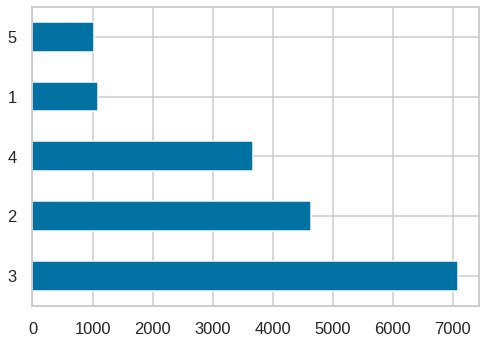

In [ ]:
df_ca_new['Bedrooms'].value_counts()[:5].plot(kind='barh')

In [ ]:
options = ['1', '2','3','4','5'] 

In [ ]:
x1 = df_ca_new[df_ca_new['Bedrooms'].isin(options)] 
x1

,Sold Price,Year built,Bedrooms,Total interior livable area,Bathrooms,Tax assessed value,Annual tax amount,Elementary School Score,Middle School Score,High School Score,Zip
1,505000,1926.0,3,872.0,2.0,505000.0,6253.0,3.0,2.0,2.0,90047
3,1775000,1947.0,5,2612.0,3.0,1775000.0,20787.0,9.0,7.0,8.0,90230
8,1590000,2001.0,4,1601.0,3.0,1087088.0,13793.0,8.0,8.0,7.0,94121
10,1310000,1953.0,4,1579.0,2.0,71347.0,904.0,7.0,5.0,6.0,95050
11,810000,2002.0,3,1393.0,2.0,679900.0,9272.0,4.0,4.0,5.0,95128
...,...,...,...,...,...,...,...,...,...,...,...
47427,2267500,1964.0,4,4680.0,5.0,2360150.0,25283.0,7.0,5.0,7.0,92861
47435,255000,1999.0,3,1560.0,2.0,68924.0,721.0,5.0,6.0,7.0,94089
47436,2300000,1919.0,3,1860.0,2.0,578000.0,7211.0,7.0,3.0,7.0,90046
47437,500000,2017.0,3,2125.0,3.0,484696.0,7627.0,7.0,7.0,8.0,95757


In [ ]:
x1["Bedrooms"] = pd.to_numeric(x1["Bedrooms"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x2 = x1.copy() #for latent variables

## **EDA**

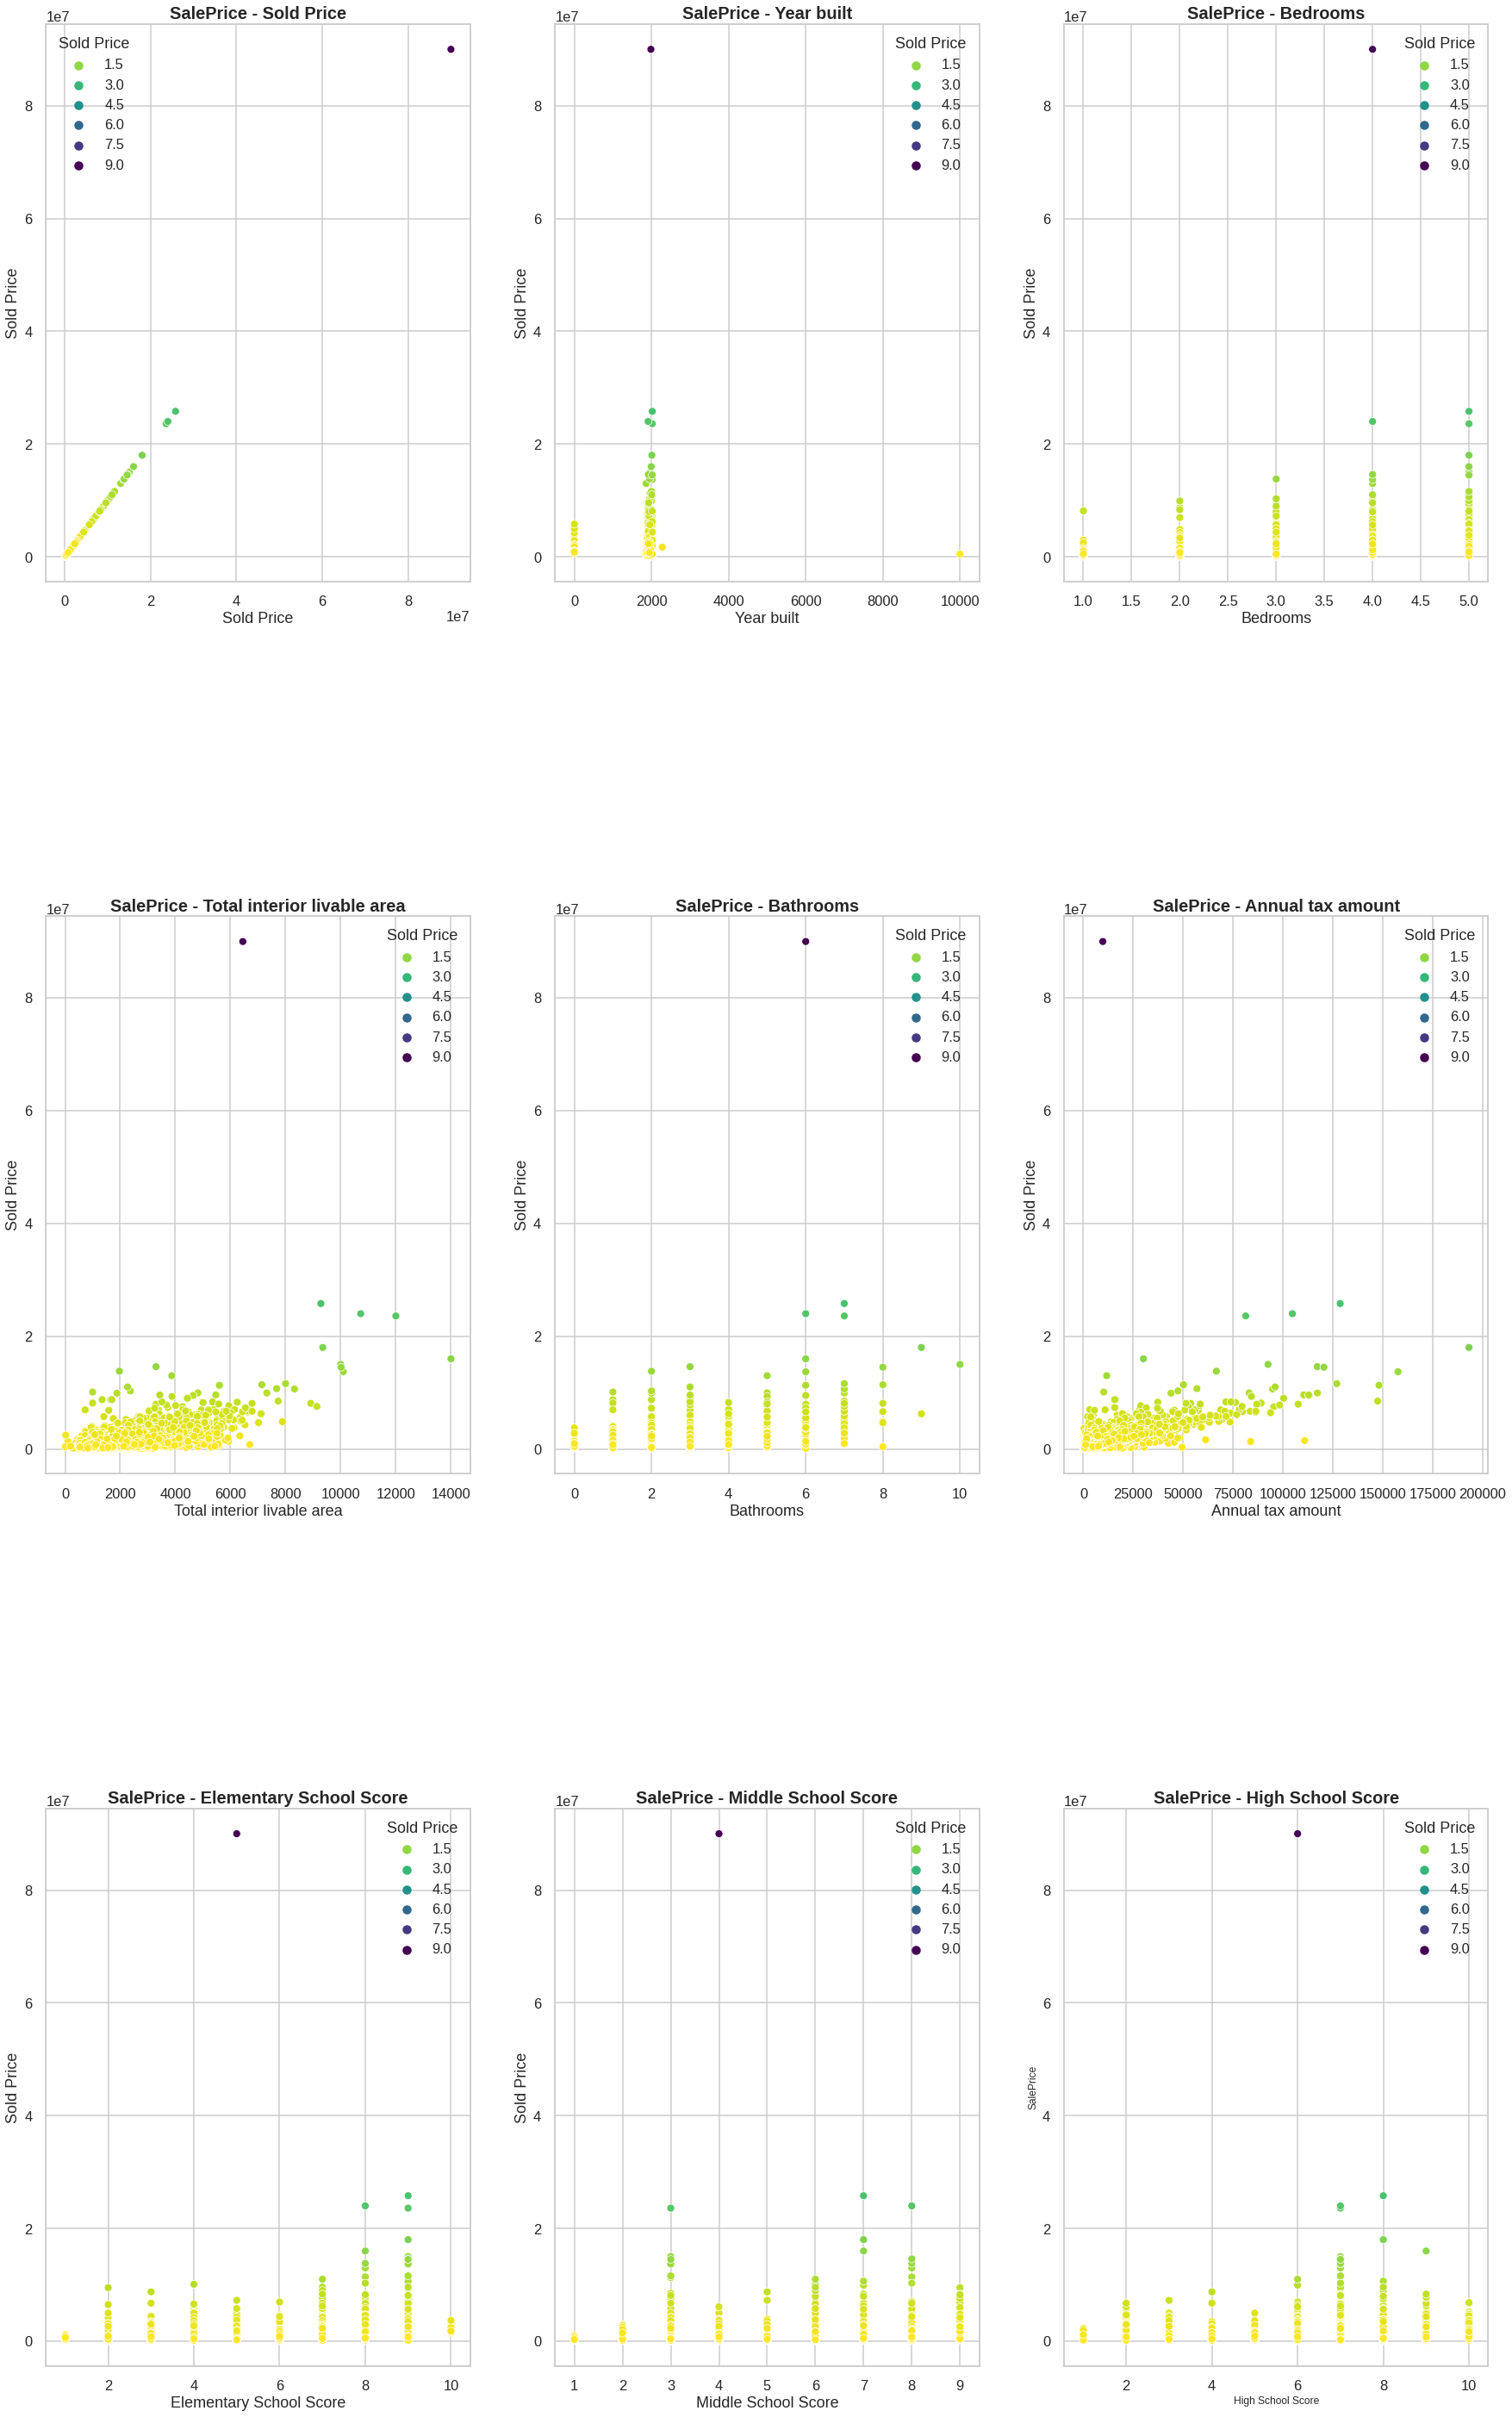

In [ ]:
#Visualising numerical predictor variables with Target Variables
plot_num = x1[['Sold Price', 'Year built', 'Bedrooms', 'Total interior livable area', 'Bathrooms', 'Annual tax amount', 'Elementary School Score', 'Middle School Score', 'High School Score']].copy()
fig,axs= plt.subplots(3,3,figsize=(30,50))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(plot_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='Sold Price', hue='Sold Price',data=plot_num,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

### **Inference**:   

Relationship between features and target feature:


We can see from above plots that, how with increasing numbers of bedroom ,property price increases.

School ranking score in the area does effect the housing prices moderately.

Total interior livable area also lineraly related with price. 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 25.9 MB 769 kB/s
     |████████████████████████████████| 10.9 MB 5.4 MB/s 
     |████████████████████████████████| 102 kB 7.3 MB/s 
     |████████████████████████████████| 690 kB 51.1 MB/s 
     |████████████████████████████████| 4.7 MB 38.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 48.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=3011d4631aaa8295d155356f7a9297abdfda9f734a6dddf63f35cfe57d651319
  Stored in directory: /tmp/pip-ephem-wheel-cache-9eoef0_j/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ceae3695948f44c82dbb8b796e61c29009775793821564989f27daa687fcf2d8
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wh

In [ ]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(x1, html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

# **Feature Importance**

### **1. Gini Score**


In [ ]:
y = x1["Sold Price"].copy()
X = x1.copy()
X.drop(columns = ['Sold Price'], inplace=True)

In [ ]:
data = x1.copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def feature_importance(m, training_df):
    importance =  m.feature_importances_
    importance =  pd.DataFrame(importance, index=training_df.columns, columns=['Importance'] )
    return importance.sort_values(by=['Importance'], ascending= False) 

In [ ]:
dtc_classifier = DecisionTreeClassifier(max_depth = 3, criterion='gini', random_state = 0)

dtc_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
importance = feature_importance(dtc_classifier, X)
importance[:]

,Importance
Tax assessed value,0.741937
Annual tax amount,0.151875
Zip,0.106188
Year built,0.000000
Bedrooms,0.000000
Total interior livable area,0.000000
Bathrooms,0.000000
Elementary School Score,0.000000
Middle School Score,0.000000
High School Score,0.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.05550477, 0.00477731, 0.30733683, 0.00685736, 0.24930335,
       0.25451636, 0.02842459, 0.0146754 , 0.02640475, 0.05219927])

In [ ]:
importance = feature_importance(rf, X)
importance[:]

,Importance
Total interior livable area,0.307337
Annual tax amount,0.254516
Tax assessed value,0.249303
Year built,0.055505
Zip,0.052199
Elementary School Score,0.028425
High School Score,0.026405
Middle School Score,0.014675
Bathrooms,0.006857
Bedrooms,0.004777


In [ ]:
from functools import reduce 

target_column = ['Sold'] 
pX = importance.index.values[::-1]
l= importance.values.tolist()
pY = (reduce(lambda Xg,yg: Xg+yg,l))[::-1]

print('predictions: ', pX)
print('results: ', pY)
print('target: ', target_column)

predictions:  ['Bedrooms' 'Bathrooms' 'Middle School Score' 'High School Score'
 'Elementary School Score' 'Zip' 'Year built' 'Tax assessed value'
 'Annual tax amount' 'Total interior livable area']
results:  [0.00477731475417988, 0.006857357471298201, 0.014675403676038732, 0.026404751782316483, 0.02842459176656244, 0.05219926913850899, 0.055504771950030916, 0.24930334587831465, 0.25451636186661286, 0.30733683171613685]
target:  ['Sold']


Feature: 0, Score: 0.30734
Feature: 1, Score: 0.25452
Feature: 2, Score: 0.24930
Feature: 3, Score: 0.05550
Feature: 4, Score: 0.05220
Feature: 5, Score: 0.02842
Feature: 6, Score: 0.02640
Feature: 7, Score: 0.01468
Feature: 8, Score: 0.00686
Feature: 9, Score: 0.00478


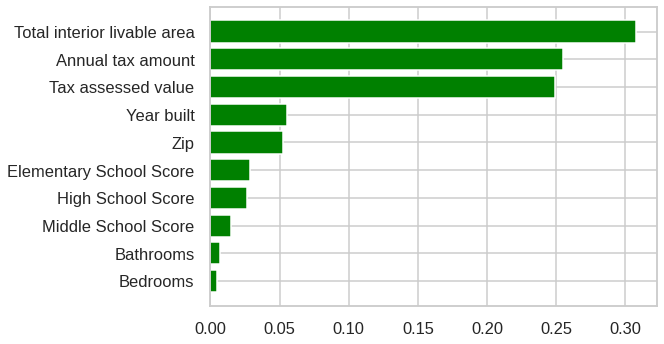

In [ ]:
# get importance
imp = np.sort(rf.feature_importances_)[::-1]

# summarize feature importance
for i,v in enumerate(imp):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
x_values= pX
y_values=  pY
x_pos = [i for i, _ in enumerate(x_values)]

plt.barh(x_pos, y_values, color='green')
plt.yticks(x_pos, x_values)
plt.show()

 we can see total area is most imporant feature and we can say that property taxes are based on the purchase price of the property. Property tax rates are high so the price is. It can be suggested that buyer can invest in some other state for the same area and features with less price.

## **2. SHAP Value**

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


In [ ]:
import shap
from shap import TreeExplainer
from shap import summary_plot

In [ ]:
#Split the  dataset
from sklearn.model_selection import train_test_split, GridSearchCV 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}, Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}')

Shape of X_train: (12258, 10), Shape of y_train: (12258,), Shape of X_test: (5254, 10), Shape of y_test: (5254,)


In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.06626597, 0.00748243, 0.15387116, 0.0114964 , 0.25468809,
       0.3848381 , 0.02765144, 0.02214916, 0.01896766, 0.05258959])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
explainer = TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(2667, 12258, 10)


In [ ]:
print(shap_values[0].shape)

(12258, 10)


3173: SHAP values for every datapoint

16174: SHAP value contributions for every feature

Finally, we can run a sanity check to make it sure real predictions from model are the same as those predicted by shap.

To do so, we'll (1) swap the first 2 dimensions of shap_values, (2) sum up SHAP values per class for all features, (3) add SHAP values to base values:

In [ ]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

True

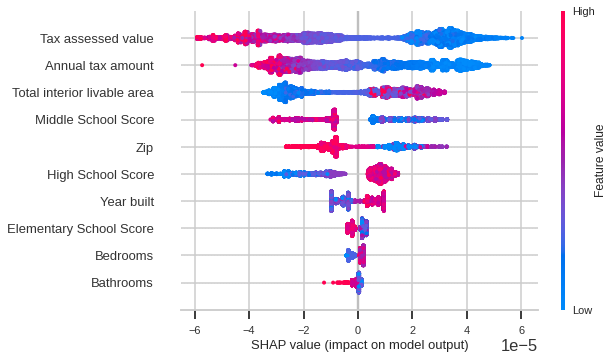

In [ ]:
summary_plot(shap_values[0],X_train)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

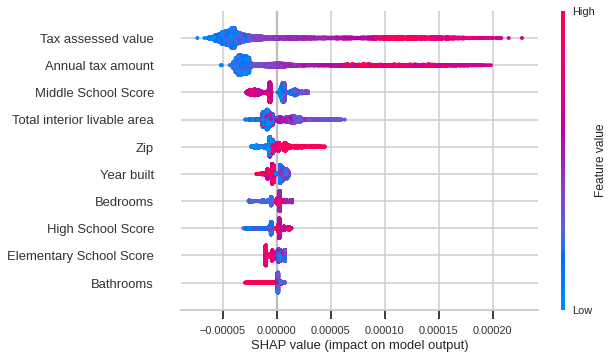

In [ ]:
summary_plot(shap_values[1],X_train)

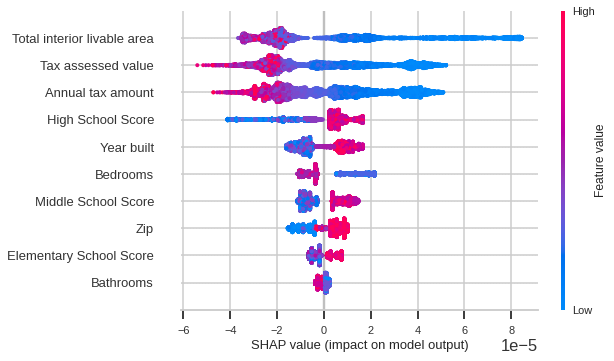

In [ ]:
summary_plot(shap_values[2],X_train)

The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

In [ ]:
#Predicting on test
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

      103896       0.00      0.00      0.00         1
      105000       0.00      0.00      0.00         1
      107000       0.00      0.00      0.00         1
      107350       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         2
      112000       0.00      0.00      0.00         1
      112500       0.00      0.00      0.00         1
      115000       0.00      0.00      0.00         1
      115500       0.00      0.00      0.00         1
      116000       0.00      0.00      0.00         2
      117000       0.00      0.00      0.00         1
      117500       0.00      0.00      0.00         1
      118000       0.00      0.00      0.00         1
      120000       0.00      0.00      0.00         3
      125000       0.00      0.00      0.00         4
      130000   

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


From the above SHAP diagram it can be concluded that features - **Total interior livable area,Annual tax amount,Elementary School Score, Bedrooms, Bathroom,Middle School Score,	High School Score	,Zip** are the better features for performing classification task.

#Regression

Regression
Implement Muller Loop to run the training dataset against - "MLPRegressor", "LinearRegression", "RandomForestRegressor","KNNRegressor", "LogisticRegression", "AdaBoost" , "DecisionTree" and display their accuracy.

Split the dataset into train and test dataset for regression tasks.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost","DecisionTree"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    DecisionTreeRegressor(random_state=0)]


max_score = 0.0
max_class = ''
score_list = []
regr_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    regr_list.append([score, name, clf, (time.time() - start_time)])
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms
df_mullerloop_regression = pd.DataFrame(regr_list, columns=["score", "name", "classifier", "Time-elapsed"]).sort_values('score', ascending=False).reset_index(drop=True)


Regression  Classifier = MLPRegressor, Score (test, accuracy) = 30.36, Training time = 20.08 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 31.95, Training time = 0.02 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 24.89, Training time = 1.06 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 23.07, Training time = 0.08 seconds


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Regression  Classifier = LogisticRegression, Score (test, accuracy) = 0.94, Training time = 192.63 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 9.91, Training time = 0.53 seconds
Regression  Classifier = DecisionTree, Score (test, accuracy) = 11.61, Training time = 0.11 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = LinearRegression, Score (test, accuracy) = 31.95


In [ ]:
df_mullerloop_regression['classifier']

0                                   LinearRegression()
1           MLPRegressor(max_iter=800, random_state=1)
2    (DecisionTreeRegressor(max_depth=2, max_featur...
3                   KNeighborsRegressor(n_neighbors=2)
4                DecisionTreeRegressor(random_state=0)
5    (DecisionTreeRegressor(max_depth=3, random_sta...
6                                 LogisticRegression()
Name: classifier, dtype: object

In [ ]:
clf_df = pd.DataFrame(list(zip(clf_list,score_list)),columns=['classifier','score'])
reg_clf = df_mullerloop_regression['classifier'][0]
reg_clf.predict(X_test)

array([1625381.91407718, 1379487.46204497, 1319913.05880024, ...,
       1667783.58618513, 1191295.98266855,  991476.27988814])

Text(0, 0.5, 'score')

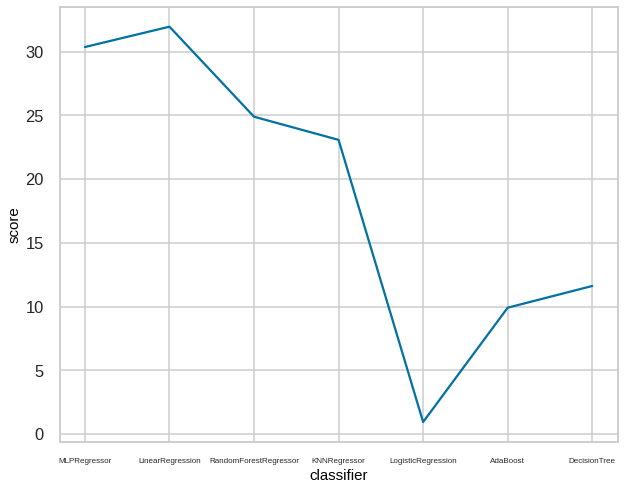

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(clf_list,score_list)
#plt.bar(x=clf_list,height=score_list)
plt.xticks(fontsize=8)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black")

# **Classification**

In classification  task, we will classify the property as - "Affordable"  or "Not Affordable" based on Value of the property.

If the property value is more than 1 Million Dollars, then it is termed as "Not Affordable"  and if it is less than or equal to 1 Million then it is termed as "Affordable".

In [ ]:
data = x1
data.head(2)

,Sold Price,Year built,Bedrooms,Total interior livable area,Bathrooms,Tax assessed value,Annual tax amount,Elementary School Score,Middle School Score,High School Score,Zip
1,505000,1926.0,3,872.0,2.0,505000.0,6253.0,3.0,2.0,2.0,90047
3,1775000,1947.0,5,2612.0,3.0,1775000.0,20787.0,9.0,7.0,8.0,90230


In [ ]:
# Assign class label Affordable/ Not Affordable
affordable = []

for i, r in data.iterrows():
  if r['Sold Price'] > 1000000:
    affordable.append(0) # Unsafe
  else:
    affordable.append(1)

data['affordable'] = affordable


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data['affordable'].value_counts()

1    8758
0    8754
Name: affordable, dtype: int64

From the above table, the target class looks balanced. hence no need of Upsampling or Downsamplig the dataset.

In [ ]:
y = data["affordable"].copy()
X = x1.copy()
X.drop(columns = ['affordable'], inplace=True)

Implement Muller Loop to run the training dataset against - "KNN Classifier", "NaiveBayes Classifier", "RandomForest Classifier", "XGB Classifier", "DecisionTreeClassifier" and display their accuracy.

In [ ]:
def plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifer, df):
  fig, ax = plt.subplots(ncols=2, figsize=(8,5))
  
  # plot the roc/auc
  ax[0].plot(fpr, tpr, label='AUC: %0.2f' % logit_roc_auc)
  ax[0].plot([0, 1], [0, 1],'r--')
  ax[0].set_xlim([0.0, 1.0])
  ax[0].set_ylim([0.0, 1.05])
  ax[0].set_xlabel('False Positive Rate')
  ax[0].set_ylabel('True Positive Rate')
  ax[0].title.set_text(type(classifer).__name__)
  ax[0].legend(loc="lower right")

  # plot the confusion matrix
  plot_confusion_matrix(classifer, 
                          X_test, 
                          y_test, 
                          ax=ax[1], 
                          cmap='Blues',
                          display_labels=np.unique(y_test))
  ax[1].title.set_text(type(classifer).__name__)
  plt.tight_layout()  

In [ ]:
def show_classification_results(metrics, df):
  # print accuracy results
  #columns=['Classifier', 'Score', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'Training Time'
  metrics.sort_values(by='Accuracy', ascending=False, inplace=True)
  pd.pandas.set_option('display.max_columns', None)
  pd.set_option('display.expand_frame_repr', False)
  print(metrics[['Classifier', 'Accuracy', 'ROC_AUC']])
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(metrics.iloc[0]['Classifier'], metrics.iloc[0]['Accuracy']))

  # plot the roc/auc 
  #columns=['name', 'y_pred', 'y_test', 'X_test', 'accu_score', 'fpr', 'tpr', 'logit_roc_auc', 'clf']
  for i, r in metrics.iterrows():
    name   = r['Classifier']
    y_pred = r['y_pred']
    y_test = r['y_test']
    X_test = r['X_test']
    accu_score = r['Accuracy']
    fpr = r['fpr']
    tpr = r['tpr']
    logit_roc_auc = r['ROC_AUC']
    classifier = r['model']
    
    # Plot the confusion matrix
    plot_classifer_metrics(name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, classifier, df)

In [ ]:
def train_evaluate_classifiers(X, y):
    # list of classifiers to compare
    names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", 
           "Random Forest", "Neural Net", "AdaBoost",
           "Naive Bayes"]

    classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    MLPClassifier(learning_rate='adaptive', early_stopping=True, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

    # init
    accu_results = []
    predictions = []
    results = []
    
    max_score = 0.0
    max_class = ''

    # Train on class target label
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state = 42)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time.time()
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)

        # find the best classifier
        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

        # add classifier predictions and metric to predictions and results
        y_pred = clf.predict(X_test)
        y_pred_score = clf.predict_proba(X_test)[:,1]
        accu_score = 100.0 * accuracy_score(y_test, y_pred)

        logit_roc_auc = roc_auc_score(y_test, y_pred_score)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

        # accumulate various scores
        f1 = 100.0 * f1_score(y_test, y_pred)
        precision = 100.0 * precision_score(y_test, y_pred)
        recall = 100.0 * recall_score(y_test, y_pred)

        # capture predictions, results in df
        predictions.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, clf]) 
        accu_results.append([name, score, logit_roc_auc, f1, precision, recall, (time.time() - start_time)])
        results.append([name, y_pred, y_test, X_test, accu_score, fpr, tpr, logit_roc_auc, f1, precision, recall, clf])
        
    results = pd.DataFrame(results, columns=['Classifier', 'y_pred', 'y_test', 'X_test', 'Accuracy', 'fpr', 'tpr', 'ROC_AUC', 'F1', 'Precision', 'Recall', 'model'])
    return results

          Classifier    Accuracy   ROC_AUC
2      Decision Tree  100.000000  1.000000
5           AdaBoost  100.000000  1.000000
4         Neural Net   99.186296  0.999817
3      Random Forest   98.915061  0.999578
1         Linear SVM   97.887223  0.998733
0  Nearest Neighbors   89.493219  0.937187
6        Naive Bayes   88.936474  0.965566
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprec

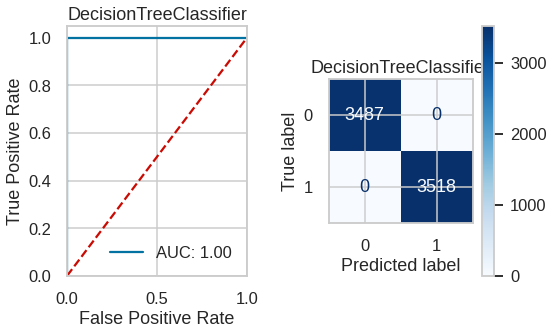

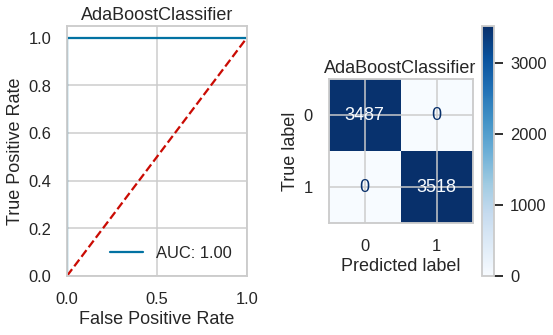

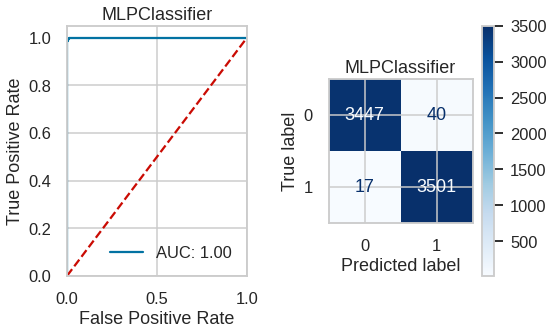

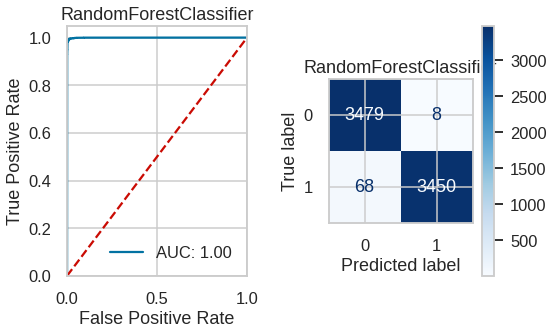

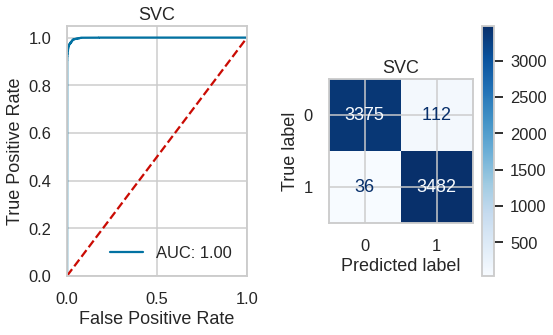

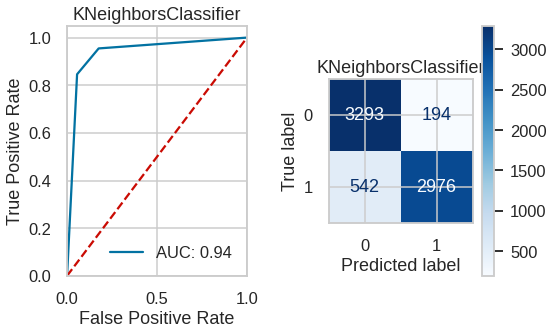

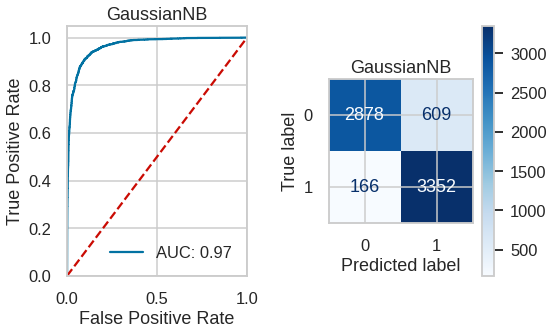

In [ ]:
metrics = train_evaluate_classifiers(X, y)
show_classification_results(metrics, data)

In [ ]:
metrics['Classifier'][2]

'Decision Tree'

# **Latent Variables**

### **How old the poperty is ?**
As people might be interested in newly built homes for better design and consutruction rather than old homes so it will be interesting to figure out how old that property is. Property listed on for sale - built on

### **What is price per square ft.?**
It will be intereting to note what is price per square ft so that we can rationally think over total area and bedrooms.

### **Region: Community or neighberhood might impact property price in various ways. (scraped)**

In [ ]:
x2['price_per_sqft'] = x2['Sold Price'] /x2['Total interior livable area']

In [ ]:
x2

,Sold Price,Year built,Bedrooms,Total interior livable area,Bathrooms,Tax assessed value,Annual tax amount,Elementary School Score,Middle School Score,High School Score,Zip,price_per_sqft
1,505000,1926.0,3,872.0,2.0,505000.0,6253.0,3.0,2.0,2.0,90047,579.128440
3,1775000,1947.0,5,2612.0,3.0,1775000.0,20787.0,9.0,7.0,8.0,90230,679.555896
8,1590000,2001.0,4,1601.0,3.0,1087088.0,13793.0,8.0,8.0,7.0,94121,993.129294
10,1310000,1953.0,4,1579.0,2.0,71347.0,904.0,7.0,5.0,6.0,95050,829.639012
11,810000,2002.0,3,1393.0,2.0,679900.0,9272.0,4.0,4.0,5.0,95128,581.478823
...,...,...,...,...,...,...,...,...,...,...,...,...
47427,2267500,1964.0,4,4680.0,5.0,2360150.0,25283.0,7.0,5.0,7.0,92861,484.508547
47435,255000,1999.0,3,1560.0,2.0,68924.0,721.0,5.0,6.0,7.0,94089,163.461538
47436,2300000,1919.0,3,1860.0,2.0,578000.0,7211.0,7.0,3.0,7.0,90046,1236.559140
47437,500000,2017.0,3,2125.0,3.0,484696.0,7627.0,7.0,7.0,8.0,95757,235.294118


In [ ]:
x2.sample()

,Sold Price,Year built,Bedrooms,Total interior livable area,Bathrooms,Tax assessed value,Annual tax amount,Elementary School Score,Middle School Score,High School Score,Zip,affordable
24865,1175000,1998.0,2,864.0,1.0,951050.0,10753.0,8.0,5.0,8.0,95018,0


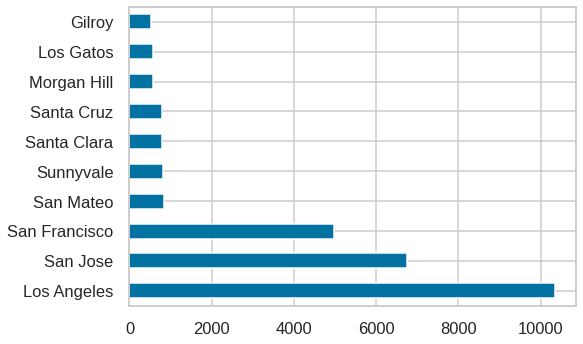

In [ ]:
add_data['Region'].value_counts()[:10].plot(kind='barh')

# **Regression after adding Latent Variable**

In [ ]:
# new target variable
y_latent= x2["Sold Price"].copy()
y_latent

1         505000
3        1775000
8        1590000
10       1310000
11        810000
          ...   
47427    2267500
47435     255000
47436    2300000
47437     500000
47438     760000
Name: Sold Price, Length: 17512, dtype: int64

In [ ]:
X_latent = x2.copy()
X_latent.drop(columns = ['Sold Price'], inplace=True)

Split the dataset into train and test dataset for regression tasks.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_latent, y_latent, test_size = 0.4, random_state = 42)

In [ ]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost","DecisionTree"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100),
    DecisionTreeRegressor(random_state=0)]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append([score, name, clf, (time.time() - start_time)])
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms
df_mullerloop_regression = pd.DataFrame(score_list, columns=["score", "name", "classifier", "Time-elapsed"]).sort_values('score', ascending=False).reset_index(drop=True)

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 30.88, Training time = 27.99 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 34.72, Training time = 0.01 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 30.09, Training time = 1.03 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 23.07, Training time = 0.05 seconds


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Regression  Classifier = LogisticRegression, Score (test, accuracy) = 1.00, Training time = 199.72 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 1.92, Training time = 0.86 seconds
Regression  Classifier = DecisionTree, Score (test, accuracy) = 25.13, Training time = 0.11 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = LinearRegression, Score (test, accuracy) = 34.72


Using the Latent variable we didn't acheive good accuracy hence no meaningful insights.

# **Pickle and load**
Pickle and load is used to save and load the machine learning model for future predictions. Pickle is used to serialize the machine learning algorithm and save it. Later we can deserialize the same for future use thus saving a lot of time. So that we don't have to train our model each time we run our application.

In [ ]:
import pickle

In [ ]:
# Save the Model to file in the current working directory

filename = "Regression_model.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(reg_clf, file)

In [ ]:
# Load the Model back from file
with open(filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

LinearRegression()

In [ ]:
X_test.drop(columns = ['affordable'], inplace=True)

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
result = Pickled_Model.score(X_test, y_test)
print(result)

0.31951365402225895


# Conclusion

Our golden cluster is able to tell us which properties are best to invest. Buying in those properties in those ranges have the highest probability of success.

Our classifier is able to tell which are the properties under the budget for a invester and are affordable.

Our regressor is able to predict the estimated price for the house.

All models are pickled and available.